# Performing advance dimentionality reduction in tabular dataset

## Step1: Import necessary libraries and load the Iris dataset

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = iris.data  # Features: Sepal length, Sepal width, Petal length, Petal width
target = iris.target  # Target: Species of Iris (0, 1, 2)

# Create a DataFrame for better visualization
df = pd.DataFrame(data, columns=iris.feature_names)
df['species'] = target

# Display the first few rows of the dataset
print(df.head())

# Features and target
X = data
y = target


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


## Step2:Normalize the features using StandardScaler


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data normalized. Shape:", X_scaled.shape)


Data normalized. Shape: (150, 4)


## Step3: Apply dimensionality reduction techniques

- Linear Local Embedding (LLE)
- t-SNE with interactive visualization
- ISOMAP
- UMAP with interactive visualization
- Multidimensional Scaling (MDS)
- Randomized PCA
- Kernel PCA
- Incremental PCA
- Factor Analysis
- Autoencoders

## Locally Linear Embedding (LLE)

Purpose: Locally Linear Embedding (LLE) is a manifold learning technique that preserves local relationships among data points. It’s ideal for visualizing non-linear structures in data.


LocallyLinearEmbedding reduces the dataset from 4 dimensions to 2 dimensions (n_components=2).
A scatter plot is created where each point represents a sample in 2D space, colored by its target class (species).

Result: A 2D visualization showing clusters of data points based on the original relationships in 4D space.

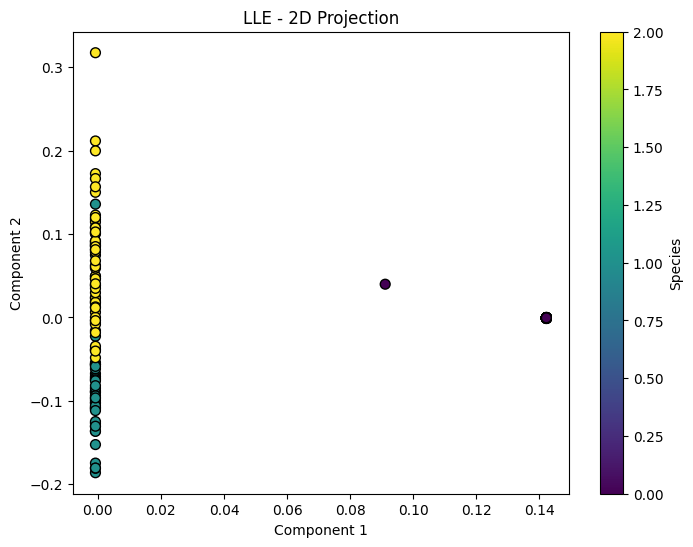

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Apply LLE to reduce dimensionality to 2D
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_scaled)

# Plot the LLE results
plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(label="Species")
plt.title("LLE - 2D Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


**t-SNE**

Purpose: t-SNE (t-distributed Stochastic Neighbor Embedding) projects data into a lower-dimensional space while preserving the local and global structure of the data. It’s highly effective for clustering and visualizing complex datasets.

Code Steps:

TSNE reduces the dataset to 2 dimensions while considering parameters like perplexity (defines the number of nearest neighbors).
A scatter plot is generated with data points clustered by their respective class labels.

Result: Clearer clusters in 2D space, showcasing relationships between classes in a visually distinct way.

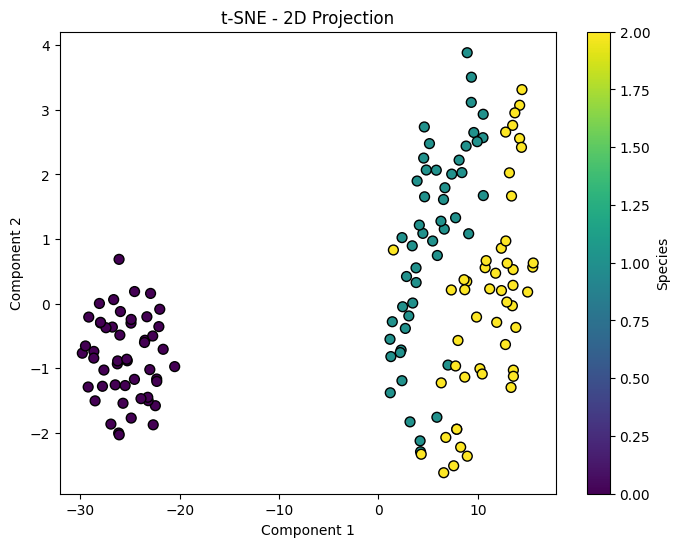

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(label="Species")
plt.title("t-SNE - 2D Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


**UMAP**

Purpose: Uniform Manifold Approximation and Projection (UMAP) reduces dimensionality while preserving global and local data structures. It’s faster than t-SNE and works well for large datasets.

Code Steps:
UMAP reduces the dataset to 2D.
A scatter plot visualizes the clusters based on the dataset's intrinsic structure.

Result: High-quality 2D visualization with distinct clusters for each class.

In [ ]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


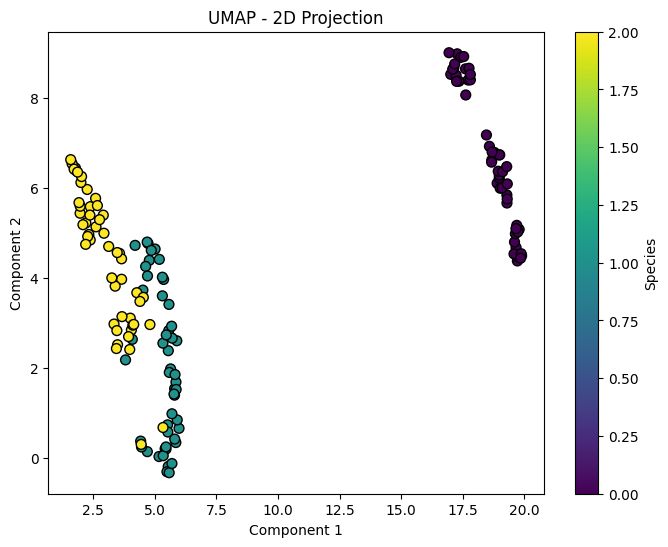

In [ ]:
import umap

# Apply UMAP to reduce dimensionality to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Plot the UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(label="Species")
plt.title("UMAP - 2D Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


Multi-Dimensional Scaling (MDS)

Purpose: Multi-Dimensional Scaling (MDS) maps data into 2D space while preserving pairwise distances between data points. It’s effective for preserving global structures.

Code Steps:
MDS reduces the dataset to 2 dimensions (n_components=2).
A scatter plot is generated, showing relationships between data points based on pairwise distances.

Result: Visualization showing clusters and distances between them in 2D space.

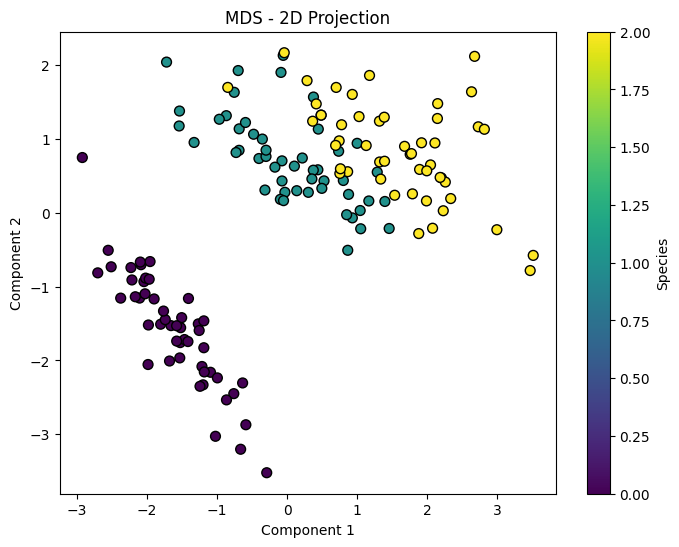

In [ ]:
from sklearn.manifold import MDS

# Apply MDS to reduce dimensionality to 2D
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# Plot the MDS results
plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(label="Species")
plt.title("MDS - 2D Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


PCA Variants

Purpose: PCA and its variants reduce dimensionality while maximizing variance or applying kernel-based transformations for non-linear relationships.

Code Steps:
PCA: Standard PCA finds principal components, reducing to 2D.
KernelPCA: Uses kernels (e.g., RBF) to uncover non-linear patterns.
IncrementalPCA: Processes data in chunks for scalability.

Result: Three distinct 2D projections using different PCA approaches, useful for comparing effectiveness.


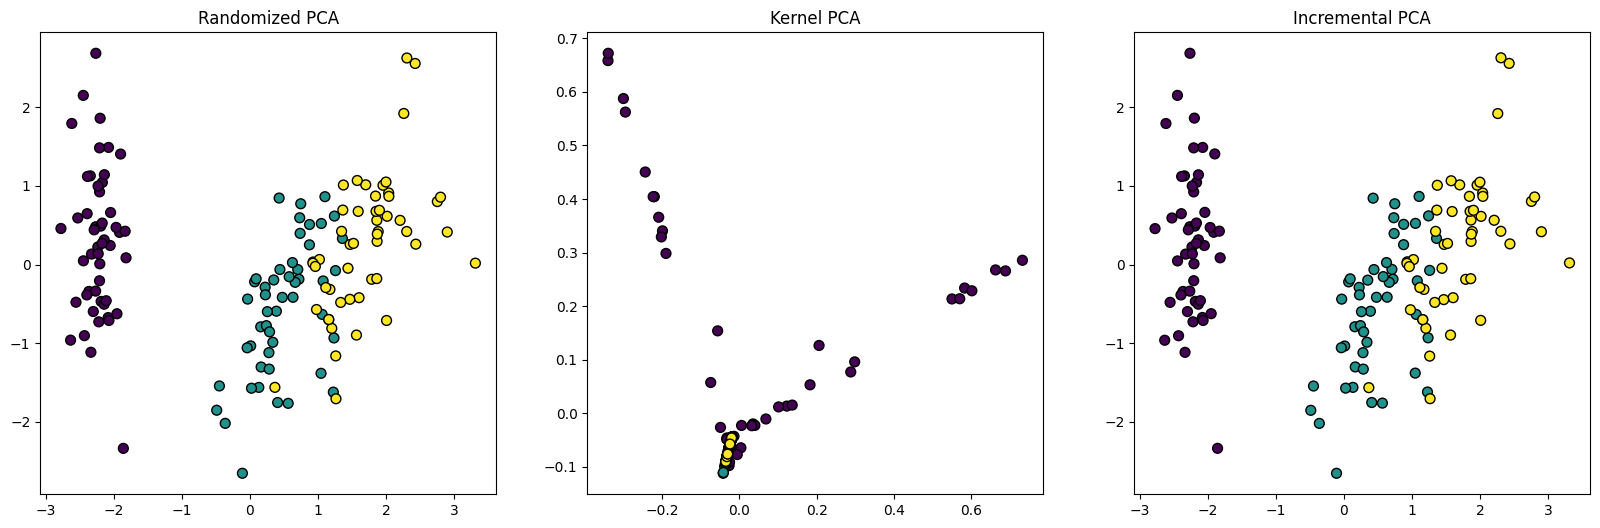

In [ ]:
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA

# Randomized PCA
random_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_random_pca = random_pca.fit_transform(X_scaled)

# Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=42)
X_kernel_pca = kernel_pca.fit_transform(X_scaled)

# Incremental PCA
incremental_pca = IncrementalPCA(n_components=2)
X_incremental_pca = incremental_pca.fit_transform(X_scaled)

# Plotting PCA Variants
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].scatter(X_random_pca[:, 0], X_random_pca[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
axes[0].set_title("Randomized PCA")
axes[1].scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
axes[1].set_title("Kernel PCA")
axes[2].scatter(X_incremental_pca[:, 0], X_incremental_pca[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
axes[2].set_title("Incremental PCA")
plt.show()


Factor Analysis

Purpose: Factor Analysis identifies latent variables (factors) that influence the dataset and reduces dimensions based on these.

Code Steps:
Reduces dimensions to 2 based on correlations among features.
Plots the data in a 2D space.

Result: A simplified representation of the original data structure.

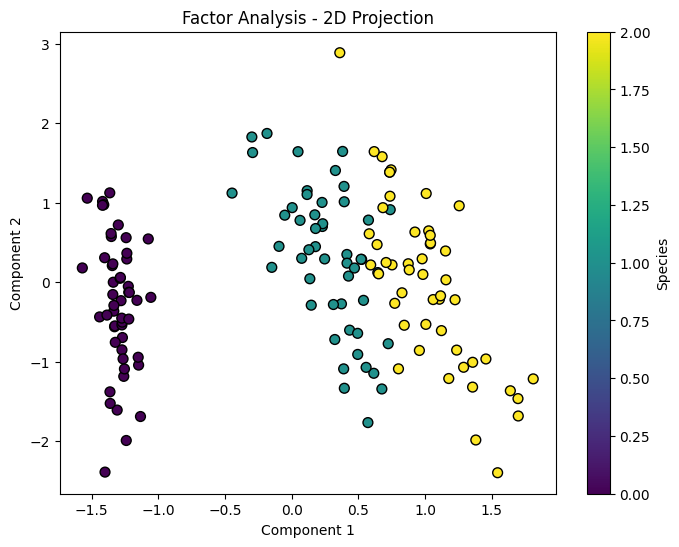

In [ ]:
from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis to reduce dimensionality to 2D
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_factor_analysis = factor_analysis.fit_transform(X_scaled)

# Plot the Factor Analysis results
plt.figure(figsize=(8, 6))
plt.scatter(X_factor_analysis[:, 0], X_factor_analysis[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(label="Species")
plt.title("Factor Analysis - 2D Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


**Autoencoders**

Purpose: Autoencoders are neural networks that learn compressed representations of data by reconstructing the input.

Code Steps:
Encoder compresses the data into 2 dimensions.
Decoder reconstructs the data, ensuring the representation retains meaningful information.
The encoded 2D data is visualized.

Result: A neural-network-based projection into 2D space, leveraging deep learning for dimensionality reduction.

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 1.0711 - val_loss: 1.0539
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9304 - val_loss: 1.0087
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9163 - val_loss: 0.9584
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8720 - val_loss: 0.9058
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8711 - val_loss: 0.8491
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7371 - val_loss: 0.7953
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6530 - val_loss: 0.7421
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6613 - val_loss: 0.6871
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6467 - val_loss: 0.6343
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6175 - val_loss: 0.5807
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5087 - val_loss: 0.5302
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4598 - val_loss: 0.4839
E

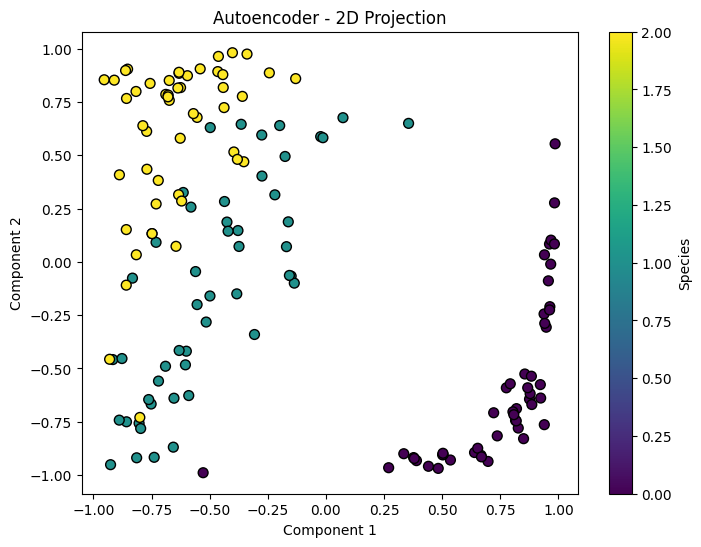

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Define Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2  # Reduce to 2D
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='tanh')(encoded)  # Encoder output
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)  # Decoder output
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile Autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Reduce dimensions using the encoder
X_autoenc = encoder.predict(X_scaled)

# Plot Autoencoder results
plt.figure(figsize=(8, 6))
plt.scatter(X_autoenc[:, 0], X_autoenc[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(label="Species")
plt.title("Autoencoder - 2D Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
